In [2]:
!pip install fsspec

In [3]:
!pip install gcsfs

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
RUTA_BASE = 'https://storage.googleapis.com/tfm_aideas_datasets'
file_path_news = f"{RUTA_BASE}/dataset_2021_news.csv"
file_path_paragraph = f"{RUTA_BASE}/dataset_2021_paragraph.csv"

In [6]:
df_news = pd.read_csv(file_path_news, sep=";", parse_dates=["date"], index_col=0)
df_news

,date,title,url,body,tags,resource,ticker,ticker_name,sector,subsector,...,alpha_exante_above_Q3,vola20_exante,vola20_expost,vola20_antepost_pct_change,vola20_umbral_Q1,vola20_umbral_abs_Q1,vola20_umbral_Q3,vola20_umbral_abs_Q3,vola_label,vola_label_abs
pk,,,,,,,,,,,,,,,,,,,,,
1656287707697_43316_IAG,2020-12-31 23:30:00,"Pasaportes, visados, ‘roaming’... Todos los ca...",https://elpais.com/internacional/2020-12-31/pa...,¿DNI o pasaporte? ¿Hay que pedir visado? ¿Sirv...,"['Brexit', 'Reino Unido', 'Europa', 'Comercio'...",ELPAIS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,Transporte y Distribución,...,False,0.595548,0.646779,0.086025,0.053808,0.114337,0.305009,0.417972,0.0,0.0
1656287513236_43316_ANA,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,ANA,"ACCIONA,S.A.","Mat.Basicos, Industria y Construcción",Construcción,...,False,0.330038,0.410053,0.242440,-0.011209,0.103677,0.208834,0.225065,1.0,1.0
1656287513236_43316_BKIA,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,BKIA,"BANKIA, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,False,0.261637,0.452613,0.729930,0.057276,0.103478,0.236113,0.315340,1.0,1.0
1656287513236_43316_CABK,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,False,0.269002,0.451665,0.679042,0.092034,0.139145,0.290371,0.324701,1.0,1.0
1656287513236_43316_IAG,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,Transporte y Distribución,...,False,0.595548,0.646779,0.086025,0.053808,0.114337,0.305009,0.417972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656406861597_6_REP,2022-01-01 21:55:00,De la Torre sitúa a Málaga en uno de sus mejor...,https://www.europapress.es/andalucia/malaga-00...,"MÁLAGA, 31 Dic. (EUROPA PRESS) -<EOL>El alcald...",['Francisco de la Torre'],EUROPAPRESS,REP,"REPSOL, S.A.",Petróleo y Energía,Petróleo,...,False,0.223100,0.283767,0.271928,-0.357201,0.272479,-0.270908,0.357201,1.0,0.0
1656406861597_6_TEF,2022-01-01 21:55:00,De la Torre sitúa a Málaga en uno de sus mejor...,https://www.europapress.es/andalucia/malaga-00...,"MÁLAGA, 31 Dic. (EUROPA PRESS) -<EOL>El alcald...",['Francisco de la Torre'],EUROPAPRESS,TEF,"TELEFONICA, S.A.",Tecnología y Telecomunicaciones,Telecomunicaciones y Otros,...,False,0.260783,0.163380,-0.373501,-0.477420,0.399914,-0.399914,0.477420,1.0,0.0
1656407079517_9_CABK,2022-01-03 10:08:00,CaixaBank Banca Privada recomienda a gran part...,https://www.europapress.es/economia/finanzas-0...,"MADRID, 28 Dic. (EUROPA PRESS) -<EOL>CaixaBank...","['Sector financiero', 'Caixabank']",EUROPAPRESS,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,False,0.214666,0.306254,0.426654,-0.089311,0.053781,0.059615,0.251531,1.0,1.0


In [7]:
df_paragraph = pd.read_csv(file_path_paragraph, sep=";", parse_dates=["date"], index_col=0)
df_paragraph

,pk_paragraph,date,title,url,body,tags,resource,ticker,ticker_name,sector,...,topic_classifier_news,topics_news,finanzas_prob_news,sector_in_topics_news,intensidad_news,finanzas_tag_s_n,impacto_tag_s_n,topic_tag_news,finanzas_tag_news_s_n,impacto_tag_news_s_n
pk,,,,,,,,,,,,,,,,,,,,,
1656287707697_43316_IAG,1656287707697_43316_IAG_0000000000,2020-12-31 23:30:00,"Pasaportes, visados, ‘roaming’... Todos los ca...",https://elpais.com/internacional/2020-12-31/pa...,¿DNI o pasaporte? ¿Hay que pedir visado? ¿Sirv...,"['Brexit', 'Reino Unido', 'Europa', 'Comercio'...",ELPAIS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,...,austeridad,"{'austeridad': 0.09253649, 'comisión europea':...",0.0,0,1.0,NaN,NaN,NaN,NaN,NaN
1656287707697_43316_IAG,1656287707697_43316_IAG_0000000001,2020-12-31 23:30:00,"Pasaportes, visados, ‘roaming’... Todos los ca...",https://elpais.com/internacional/2020-12-31/pa...,Sí. Los pactos alcanzados garantizan la reside...,"['Brexit', 'Reino Unido', 'Europa', 'Comercio'...",ELPAIS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,...,austeridad,"{'austeridad': 0.09253649, 'comisión europea':...",0.0,0,1.0,NaN,NaN,NaN,NaN,NaN
1656287707697_43316_IAG,1656287707697_43316_IAG_0000000002,2020-12-31 23:30:00,"Pasaportes, visados, ‘roaming’... Todos los ca...",https://elpais.com/internacional/2020-12-31/pa...,"Sí, hay que solicitar un documento de residenc...","['Brexit', 'Reino Unido', 'Europa', 'Comercio'...",ELPAIS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,...,austeridad,"{'austeridad': 0.09253649, 'comisión europea':...",0.0,0,1.0,NaN,NaN,NaN,NaN,NaN
1656287707697_43316_IAG,1656287707697_43316_IAG_0000000003,2020-12-31 23:30:00,"Pasaportes, visados, ‘roaming’... Todos los ca...",https://elpais.com/internacional/2020-12-31/pa...,El Acuerdo de Retirada del Reino Unido de la U...,"['Brexit', 'Reino Unido', 'Europa', 'Comercio'...",ELPAIS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,...,austeridad,"{'austeridad': 0.09253649, 'comisión europea':...",0.0,0,1.0,NaN,NaN,NaN,NaN,NaN
1656287707697_43316_IAG,1656287707697_43316_IAG_0000000004,2020-12-31 23:30:00,"Pasaportes, visados, ‘roaming’... Todos los ca...",https://elpais.com/internacional/2020-12-31/pa...,No. Se podrá visitar el país para periodos de ...,"['Brexit', 'Reino Unido', 'Europa', 'Comercio'...",ELPAIS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,...,austeridad,"{'austeridad': 0.09253649, 'comisión europea':...",0.0,0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656404116271_9_CABK,1656404116271_9_CABK_0000000503,2022-03-11 17:25:00,La Fundación La Caixa une a más de 100 voces a...,https://www.europapress.es/catalunya/noticia-f...,La acción se desarrolla en espacios emblemátic...,['La Caixa'],EUROPAPRESS,CABK,"CAIXABANK, S.A.",Servicios Financieros,...,famosos,"{'famosos': 0.059421416, 'joan manuel serrat':...",0.0,0,4.0,NaN,NaN,NaN,NaN,NaN
1656404116271_9_CABK,1656404116271_9_CABK_0000000504,2022-03-11 17:25:00,La Fundación La Caixa une a más de 100 voces a...,https://www.europapress.es/catalunya/noticia-f...,Igor Cortadellas ha sido el encargado de la di...,['La Caixa'],EUROPAPRESS,CABK,"CAIXABANK, S.A.",Servicios Financieros,...,famosos,"{'famosos': 0.059421416, 'joan manuel serrat':...",0.0,0,4.0,NaN,NaN,NaN,NaN,NaN
1656404116271_9_CABK,1656404116271_9_CABK_0000000505,2022-03-11 17:25:00,La Fundación La Caixa une a más de 100 voces a...,https://www.europapress.es/catalunya/noticia-f...,También ha contado con la producción musical d...,['La Caixa'],EUROPAPRESS,CABK,"CAIXABANK, S.A.",Servicios Financieros,...,famosos,"{'famosos': 0.059421416, 'joan manuel serrat':...",0.0,0,4.0,NaN,NaN,NaN,NaN,NaN


# INCIO REEMPLAZAR TODA ESTA PARTE POR EL VOLA_PARAGRAPH

In [8]:
features = df_model = df_paragraph[['date','sector','subsector','body_no_entities','alpha_exante','alpha_exante_Q3','vola20_exante',
                        #  'vola_label_calc','finanzas_tag_s_n','finanzas_tag_s_n_proba', 'impacto_tag_s_n','impacto_tag_s_n_proba'
                         ]].copy()
target = df_paragraph.vola_label

In [27]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
target = lb.fit_transform(df_paragraph.vola_label)
target

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [29]:
np.unique(target)

array([0, 1, 2], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix

In [11]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix

In [12]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN, Flatten

In [13]:
features.dropna(inplace=True)

In [31]:
from collections import Counter

target_freq = Counter(target)
target_freq

Counter({1: 144225, 2: 200021, 0: 155408})

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [16]:
features[["alpha_exante", "alpha_exante_Q3", "vola20_exante"]] = ss.fit_transform(features[["alpha_exante", "alpha_exante_Q3", "vola20_exante"]])

In [17]:
# features.drop("date", axis=1, inplace=True)

In [18]:
features = pd.get_dummies(features, columns=["sector", "subsector"], drop_first=True)
features

,date,body_no_entities,alpha_exante,alpha_exante_Q3,vola20_exante,"sector_Mat.Basicos, Industria y Construcción",sector_Petróleo y Energía,sector_Servicios Financieros,sector_Servicios Inmobiliarios,sector_Servicios de Consumo,...,subsector_Ingeniería y Otros,"subsector_Mineral, Metales y Transformación","subsector_Ocio, Turismo y Hostelería",subsector_Petróleo,subsector_Productos farmaceúticos y Biotecnología,subsector_SOCIMI,subsector_Seguros,subsector_Telecomunicaciones y Otros,"subsector_Textil, Vestido y Calzado",subsector_Transporte y Distribución
pk,,,,,,,,,,,,,,,,,,,,,
1656287707697_43316_IAG,2020-12-31 23:30:00,¿DNI o pasaporte? ¿Hay que pedir visado? ¿Sirv...,-0.505516,4.123273,2.788761,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1656287707697_43316_IAG,2020-12-31 23:30:00,Sí. Los pactos alcanzados garantizan la reside...,-0.505516,4.123273,2.788761,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1656287707697_43316_IAG,2020-12-31 23:30:00,"Sí, hay que solicitar un documento de residenc...",-0.505516,4.123273,2.788761,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1656287707697_43316_IAG,2020-12-31 23:30:00,El Acuerdo de Retirada del Reino Unido de la U...,-0.505516,4.123273,2.788761,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1656287707697_43316_IAG,2020-12-31 23:30:00,No. Se podrá visitar el país para periodos de ...,-0.505516,4.123273,2.788761,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656404116271_9_CABK,2022-03-11 17:25:00,La acción se desarrolla en espacios emblemátic...,0.096261,1.295796,2.129240,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1656404116271_9_CABK,2022-03-11 17:25:00,Igor Cortadellas ha sido el encargado de la di...,0.096261,1.295796,2.129240,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1656404116271_9_CABK,2022-03-11 17:25:00,También ha contado con la producción musical d...,0.096261,1.295796,2.129240,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
features.drop("body_no_entities", axis=1, inplace=True)

In [20]:
features.dtypes

date                                                 datetime64[ns]
alpha_exante                                                float64
alpha_exante_Q3                                             float64
vola20_exante                                               float64
sector_Mat.Basicos, Industria y Construcción                  uint8
sector_Petróleo y Energía                                     uint8
sector_Servicios Financieros                                  uint8
sector_Servicios Inmobiliarios                                uint8
sector_Servicios de Consumo                                   uint8
sector_Tecnología y Telecomunicaciones                        uint8
subsector_Bancos y Cajas de Ahorro                            uint8
subsector_Construcción                                        uint8
subsector_Electricidad y Gas                                  uint8
subsector_Electrónica y Software                              uint8
subsector_Energías Renovables                   

In [21]:
features.alpha_exante = features.alpha_exante.astype(np.float32)
features.alpha_exante_Q3 = features.alpha_exante_Q3.astype(np.float32)
features.vola20_exante = features.vola20_exante.astype(np.float32)
features.dtypes

date                                                 datetime64[ns]
alpha_exante                                                float32
alpha_exante_Q3                                             float32
vola20_exante                                               float32
sector_Mat.Basicos, Industria y Construcción                  uint8
sector_Petróleo y Energía                                     uint8
sector_Servicios Financieros                                  uint8
sector_Servicios Inmobiliarios                                uint8
sector_Servicios de Consumo                                   uint8
sector_Tecnología y Telecomunicaciones                        uint8
subsector_Bancos y Cajas de Ahorro                            uint8
subsector_Construcción                                        uint8
subsector_Electricidad y Gas                                  uint8
subsector_Electrónica y Software                              uint8
subsector_Energías Renovables                   

In [25]:
#### MODEL BASIC, reemplazar por el bueno
model = Sequential()
#-1 porque borramos la fecha
model.add(Dense(8, input_dim=features.shape[1] - 1, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )

# FIN REEMPLAZAR TODA ESTA PARTE POR EL VOLA_PARAGRAPH

#### Validación Cruzada con partición lineal.  (Tomas Notebook timeseries_dataset_split)
En este caso respetamos la relación temporal de los ejemplos
para que no se mezclen en los conjuntos de train/test de forma
consecutiva

In [49]:
kfold = KFold(n_splits=4, shuffle=False)
acc = []

for train, test in kfold.split(features):
    print(len(train), len(test))
    print(train,test)
    fold_train_x = features.iloc[train.tolist()]
    fold_train_y = target[train.tolist()]
    fold_train_x.drop("date", axis=1, inplace=True)
    # history = model.fit(fold_train_x, fold_train_y, epochs=1, batch_size=128,  validation_split=0.2)
    
    fold_test_x = features.iloc[test.tolist()]
    fold_test_y = target[test]
    fold_test_x.drop("date", axis=1, inplace=True)
    # fold_pred_y = model.predict(fold_test_x)
    # i_acc = accuracy_score(fold_test_y, fold_pred_y)

    # acc.append(i_acc)

374740 124914
[124914 124915 124916 ... 499651 499652 499653] [     0      1      2 ... 124911 124912 124913]


C:\Users\Tienda\AppData\Local\Temp/ipykernel_101148/725078521.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold_train_x.drop("date", axis=1, inplace=True)
C:\Users\Tienda\AppData\Local\Temp/ipykernel_101148/725078521.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold_test_x.drop("date", axis=1, inplace=True)


374740 124914
[     0      1      2 ... 499651 499652 499653] [124914 124915 124916 ... 249825 249826 249827]


C:\Users\Tienda\AppData\Local\Temp/ipykernel_101148/725078521.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold_train_x.drop("date", axis=1, inplace=True)
C:\Users\Tienda\AppData\Local\Temp/ipykernel_101148/725078521.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold_test_x.drop("date", axis=1, inplace=True)


374741 124913
[     0      1      2 ... 499651 499652 499653] [249828 249829 249830 ... 374738 374739 374740]


C:\Users\Tienda\AppData\Local\Temp/ipykernel_101148/725078521.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold_train_x.drop("date", axis=1, inplace=True)
C:\Users\Tienda\AppData\Local\Temp/ipykernel_101148/725078521.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold_test_x.drop("date", axis=1, inplace=True)


374741 124913
[     0      1      2 ... 374738 374739 374740] [374741 374742 374743 ... 499651 499652 499653]


C:\Users\Tienda\AppData\Local\Temp/ipykernel_101148/725078521.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold_train_x.drop("date", axis=1, inplace=True)
C:\Users\Tienda\AppData\Local\Temp/ipykernel_101148/725078521.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold_test_x.drop("date", axis=1, inplace=True)


El accuracy para cada iteracion

In [ ]:
acc

[0.6505684321847184,
 0.7289793759915388,
 0.7606204829895998,
 0.6422527763088313]

In [ ]:
np.mean(acc)

0.6956052668686721

## TIME SERIES SPLIT

In [50]:
features.reset_index(drop=True, inplace=True)
features.index = list(features.index)
features.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            499644, 499645, 499646, 499647, 499648, 499649, 499650, 499651,
            499652, 499653],
           dtype='int64', length=499654)

In [52]:
# target.reset_index(drop=True, inplace=True)
# target.index = list(target.index)
# target.index

target

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [76]:
features.resample(rule='M', on='date').size()

date
2020-12-31       19
2021-01-31    44932
2021-02-28    40748
2021-03-31    43120
2021-04-30    38468
2021-05-31    45917
2021-06-30    50873
2021-07-31    43837
2021-08-31    26301
2021-09-30    41666
2021-10-31    45532
2021-11-30    44646
2021-12-31    33504
2022-01-31       80
2022-02-28        0
2022-03-31       11
Freq: M, dtype: int64

In [79]:
features.resample(rule='M', on='date').size().iloc[1:-3]

date
2021-01-31    44932
2021-02-28    40748
2021-03-31    43120
2021-04-30    38468
2021-05-31    45917
2021-06-30    50873
2021-07-31    43837
2021-08-31    26301
2021-09-30    41666
2021-10-31    45532
2021-11-30    44646
2021-12-31    33504
Freq: M, dtype: int64

In [80]:
np.mean(features.resample(rule='M', on='date').size().iloc[1:-3])

41628.666666666664

In [81]:
GAP = features.shape[0] / 12
int(GAP)

41637

In [60]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=8, gap=int(GAP))
print(tscv)
acc = []

for train_index, test_index in tscv.split(features):
  print("TRAIN:", train_index, "TEST:", test_index)
  print("TRAIN len:", len(train_index), "TEST len:", len(test_index))
  print(f"TRAIN dates: {features.iloc[train_index[0]].date} - {features.iloc[train_index[-1]].date}  TEST len: {features.iloc[test_index[0]].date} - {features.iloc[test_index[-1]].date}") 
  X_train, X_test = features.iloc[train_index], features.iloc[test_index]
  y_train, y_test = target[train_index], target[test_index]
  # history = model.fit(fold_train_x, fold_train_y, epochs=5, batch_size=128,  validation_split=0.2)
  # fold_pred_y = model.predict(fold_test_x)
  # i_acc = accuracy_score(fold_test_y, fold_pred_y)
  # acc.append(i_acc)

TimeSeriesSplit(gap=41637, max_train_size=None, n_splits=8, test_size=None)
TRAIN: [    0     1     2 ... 13878 13879 13880] TEST: [ 55518  55519  55520 ... 111032 111033 111034]
TRAIN len: 13881 TEST len: 55517
TRAIN dates: 2020-12-31 23:30:00 - 2021-01-12 14:21:14  TEST len: 2021-02-06 23:30:00 - 2021-03-19 04:45:00
TRAIN: [    0     1     2 ... 69395 69396 69397] TEST: [111035 111036 111037 ... 166549 166550 166551]
TRAIN len: 69398 TEST len: 55517
TRAIN dates: 2020-12-31 23:30:00 - 2021-02-17 08:18:01  TEST len: 2021-03-19 06:30:32 - 2021-04-30 10:52:00
TRAIN: [     0      1      2 ... 124912 124913 124914] TEST: [166552 166553 166554 ... 222066 222067 222068]
TRAIN len: 124915 TEST len: 55517
TRAIN dates: 2020-12-31 23:30:00 - 2021-03-29 13:31:00  TEST len: 2021-04-30 10:52:00 - 2021-06-04 22:28:20
TRAIN: [     0      1      2 ... 180429 180430 180431] TEST: [222069 222070 222071 ... 277583 277584 277585]
TRAIN len: 180432 TEST len: 55517
TRAIN dates: 2020-12-31 23:30:00 - 2021-05

# BLOCKING TIME SERIES SPLIT

In [62]:
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.5 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

In [65]:
from more_itertools import windowed
import numpy as np
import warnings

class BlockingTimeSeriesSplit():
    def __init__(self,n_splits=5,gap=0,group_fold_size=None):
        """
        Adapted from https://github.com/wajihullahbaig/IEEE-CIS-Fraud-Detection/blob/master/BlockingTimeSeriesSplit.py
        with gap and allowed overlap. 
        
        group_fold_size : size of each fold in relation to group
        group_fold_size * n_splits >= len(unique(groups)). Set equal if group_fold_size = None. 
        """
        self.n_splits = n_splits
        self.gap = gap
        self.group_fold_size = group_fold_size
    
    def get_n_splits(self,X,y,groups):
        return self.n_splits
        
    def split(self,X,groups,y=None,test_size=0.2):
        """
        test_size : proportion of fold to use for testing. This will be affected by gap. 
        """
        
        group_indices = {i:np.where(groups==i) for i in np.unique(groups)}
        groups = np.unique(groups)
        if self.group_fold_size is None:
            group_fold_size = len(groups)//self.n_splits
        elif self.group_fold_size > len(groups):
            raise AssertionError(f'group_fold_size={self.group_fold_size} is greater than the number of groups ({len(groups)}).')
        elif self.group_fold_size * self.n_splits < len(groups):
            warnings.warn(f'group_fold_size={self.group_fold_size} is too small for a group of {len(groups)} items. Setting group_fold_size={(len(groups))//self.n_splits}.')
            group_fold_size = len(groups)//self.n_splits
        else:
            group_fold_size = self.group_fold_size
            
        splits = list(windowed(groups,group_fold_size,step=1))
        idx = np.round(np.linspace(0, len(splits)-1, self.n_splits)).astype(int)
        splits = [splits[i] for i in idx]
        
        for idx in splits:
            idx = list(filter(None,idx))
            mid = int((1-test_size) * len(idx))
            group_idx_tr, group_idx_te = idx[0: mid], idx[mid + self.gap: -1]
            
            if len(group_idx_te) < 1:
                break
            
            tr = np.concatenate([group_indices[gr_i] for gr_i in group_idx_tr],axis=1).ravel()
            te = np.concatenate([group_indices[gr_i] for gr_i in group_idx_te],axis=1).ravel()
            yield tr,te

In [66]:
btscv = BlockingTimeSeriesSplit(n_splits=8, gap=int(GAP))

In [67]:
# for train_index, test_index in btscv.split(features):
for train_index, test_index in btscv.split(features, groups=df_paragraph['date'].values):
  print("TRAIN:", train_index, "TEST:", test_index)
  print("TRAIN len:", len(train_index), "TEST len:", len(test_index))
  print(f"TRAIN dates: {features.iloc[train_index[0]].date} - {features.iloc[train_index[-1]].date}  TEST len: {features.iloc[test_index[0]].date} - {features.iloc[test_index[-1]].date}")  
  X_train, X_test = features.iloc[train_index], features.iloc[test_index]
  y_train, y_test = target[train_index], target[test_index]
  history = model.fit(fold_train_x, fold_train_y, epochs=5, batch_size=128,  validation_split=0.2)
  fold_pred_y = model.predict(fold_test_x)
  i_acc = accuracy_score(fold_test_y, fold_pred_y)
  acc.append(i_acc)

## DIFERENCIAS TimeSeriesSplit VS BlockingTimeSeriesSplit

In [ ]:
# random data points
n_points = 100
n_features = 10
X = np.random.randn(n_points, n_features)

# imbalanced  classes 
percentiles_classes = [.2, .3, .5]
y = np.hstack([[ii] * int(n_points * perc)
               for ii, perc in enumerate(percentiles_classes)])

In [ ]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,1.299618,-0.932668,-0.436054,0.278985,0.703545,0.463889,-0.721523,1.119529,0.070059,0.097947
1,-0.570674,0.432512,0.501077,-0.041831,0.734792,0.025489,-0.291562,0.111811,-0.748907,1.207558
2,-1.379002,-0.253216,0.208228,0.884943,0.695196,-2.307482,-0.800776,-0.020255,0.262908,0.596445
3,-0.954494,-1.044300,-0.245919,-0.821956,1.861995,-1.460460,0.514671,1.573825,-0.110105,0.609980
4,-0.591604,-0.767522,0.158751,0.320760,0.892157,-1.299261,-0.251371,-0.405879,1.162821,-1.132175


In [ ]:
df = X.copy()
df['class'] = y

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=None)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)
        
    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+1.2, -.1], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

In [ ]:
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 5

In [ ]:
from matplotlib.patches import Patch

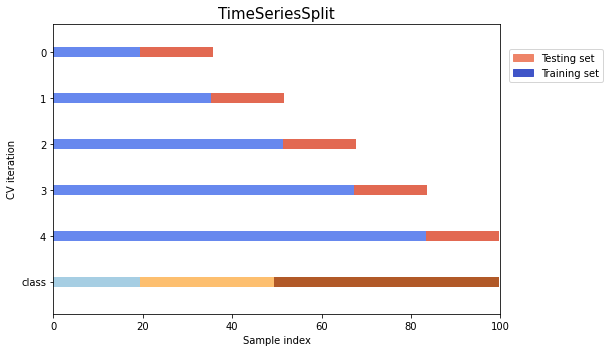

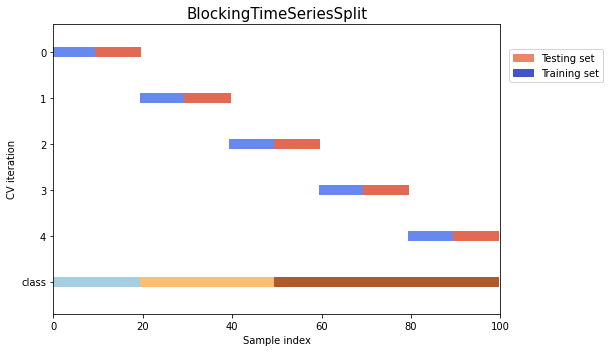

In [ ]:
cvs = [TimeSeriesSplit, BlockingTimeSeriesSplit]

for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_cv_indices(this_cv, X, y, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
            ['Testing set', 'Training set'], loc=(1.02, .8))
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
        
plt.show()

# SKTIME

In [ ]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import MaxNLocator

from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import (
    CutoffSplitter,
    ExpandingWindowSplitter,
    SingleWindowSplitter,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.utils.plotting import plot_series

In [ ]:
def plot_windows(y, train_windows, test_windows, title=""):
    """Visualize training and test windows"""

    simplefilter("ignore", category=UserWarning)

    def get_y(length, split):
        # Create a constant vector based on the split for y-axis."""
        return np.ones(length) * split

    n_splits = len(train_windows)
    n_timepoints = len(y)
    len_test = len(test_windows[0])

    train_color, test_color = sns.color_palette("colorblind")[:2]

    fig, ax = plt.subplots(figsize=plt.figaspect(0.3))

    for i in range(n_splits):
        train = train_windows[i]
        test = test_windows[i]

        ax.plot(
            np.arange(n_timepoints), get_y(n_timepoints, i), marker="o", c="lightgray"
        )
        ax.plot(
            train,
            get_y(len(train), i),
            marker="o",
            c=train_color,
            label="Window",
        )
        ax.plot(
            test,
            get_y(len_test, i),
            marker="o",
            c=test_color,
            label="Forecasting horizon",
        )
    ax.invert_yaxis()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set(
        title=title,
        ylabel="Window number",
        xlabel="Time",
        xticklabels=y.index,
    )
    # remove duplicate labels/handles
    handles, labels = [(leg[:2]) for leg in ax.get_legend_handles_labels()]
    ax.legend(handles, labels);

In [ ]:
window_length = 5
fh = ForecastingHorizon([1, 2, 3])

In [ ]:
y = target.iloc[:10]

#### SingleWindowSplitter

In [ ]:
cv = SingleWindowSplitter(window_length=window_length, fh=fh)
n_splits = cv.get_n_splits(y)
print(f"Number of Folds = {n_splits}")

Number of Folds = 1


In [ ]:
def get_windows(y, cv):
    """Generate windows"""
    train_windows = []
    test_windows = []
    for i, (train, test) in enumerate(cv.split(y)):
        train_windows.append(train)
        test_windows.append(test)
    return train_windows, test_windows

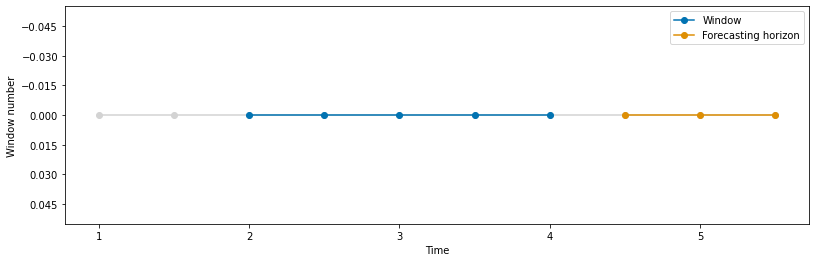

In [ ]:
train_windows, test_windows = get_windows(y, cv)
plot_windows(y, train_windows, test_windows)

### SlidingWindowSplitter

In [ ]:
cv = SlidingWindowSplitter(window_length=window_length, fh=fh)

n_splits = cv.get_n_splits(y)
print(f"Number of Folds = {n_splits}")

Number of Folds = 3


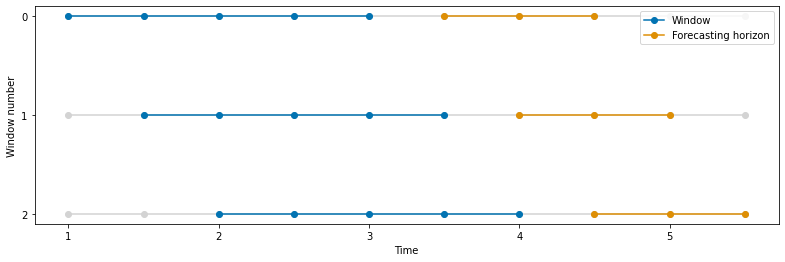

In [ ]:
train_windows, test_windows = get_windows(y, cv)
plot_windows(y, train_windows, test_windows)

### ExpandingWindowSplitter

In [ ]:
cv = ExpandingWindowSplitter(initial_window=window_length, fh=fh)

n_splits = cv.get_n_splits(y)
print(f"Number of Folds = {n_splits}")

Number of Folds = 3


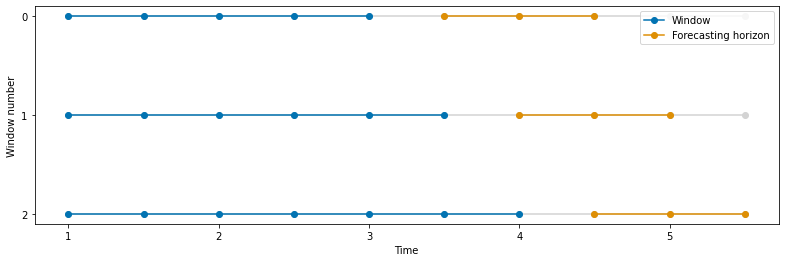

In [ ]:
train_windows, test_windows = get_windows(y, cv)
plot_windows(y, train_windows, test_windows)

### CutoffSplitter

In [ ]:
cutoffs = np.array([10, 13, 15, 25])

cv = CutoffSplitter(cutoffs=cutoffs, window_length=window_length, fh=fh)

n_splits = cv.get_n_splits(y)
print(f"Number of Folds = {n_splits}")

Number of Folds = 4


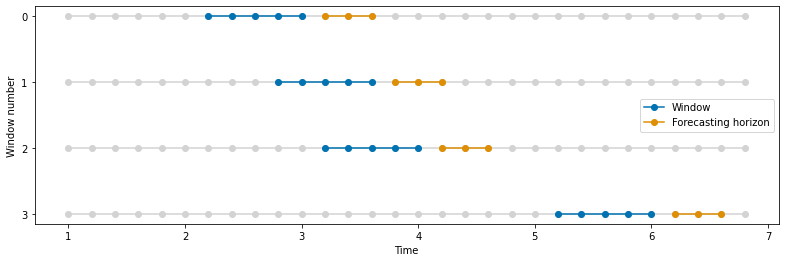

In [ ]:
train_windows, test_windows = get_windows(target.iloc[:30], cv)
plot_windows(target.iloc[:30], train_windows, test_windows)